In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
import seaborn as sns
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [2]:
from glob import glob

files = sorted(glob('/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/*.nc'))
files

['/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-OLR_Spacemean.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-OLR_Subset_200101-201512.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-OLR_Timemean.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-SWDO_Subset_200101-201512.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-SWDO_Timemean.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-SWUP_Subset_200101-201512.nc',
 '/Users/Fairy/Desktop/General_Circulation/week1/CERES__EBAF__export/CERES_EBAF-SWUP_Timemean.nc']

In [3]:
ds = xr.open_dataset(files[0])
OLR_toa_lw_globalmean_mon = ds.toa_lw_all_mon
ds = xr.open_dataset(files[1])
OLR_toa_lw_all_mon = ds.toa_lw_all_mon
ds = xr.open_dataset(files[2])
OLR_toa_lw_all_timemean = ds.toa_lw_all_mon[0]
ds = xr.open_dataset(files[3])
SWDO_all_monthly = ds.solar_mon
ds = xr.open_dataset(files[4])
SWDO_all_timemean = ds.solar_mon[0]
#print(ds)
ds = xr.open_dataset(files[5])
SWUP_all_monthly = ds.toa_sw_all_mon
ds = xr.open_dataset(files[6])
SWUP_all_timemean = ds.toa_sw_all_mon[0]

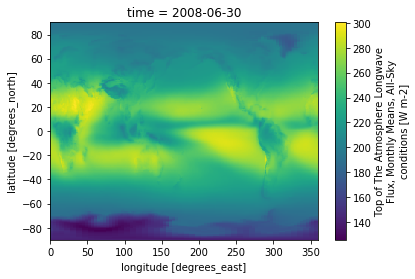

In [4]:
OLR_toa_lw_all_timemean.plot()

Text(0.5, 1.0, 'OLR long time average (2001-2015)')

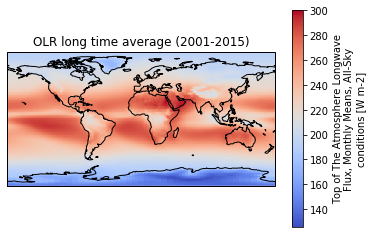

In [5]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
OLR_toa_lw_all_timemean.plot(cmap=plt.cm.coolwarm)
plt.title('OLR long time average (2001-2015)')
#plot slide 7

Text(0.5, 1.0, 'SWDO long time average')

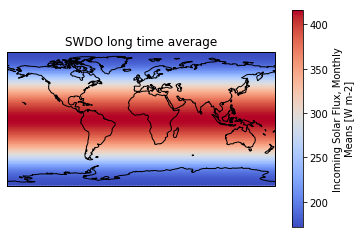

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
SWDO_all_timemean.plot(cmap=plt.cm.coolwarm)
plt.title('SWDO long time average')
##plot not needed

Text(0.5, 1.0, 'SWUP long time average')

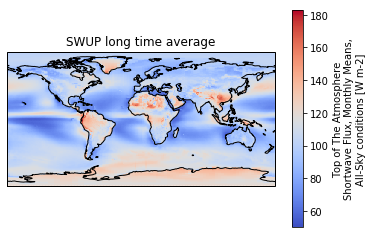

In [7]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
SWUP_all_timemean.plot(cmap=plt.cm.coolwarm)
plt.title('SWUP long time average')
##plot not needed

Text(0.5, 1.0, 'SW net long time average')

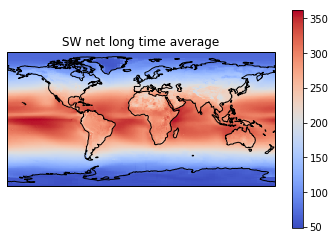

In [8]:
SW_net_all_timemean = SWDO_all_timemean-SWUP_all_timemean
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
SW_net_all_timemean.plot(cmap=plt.cm.coolwarm)
plt.title('SW net long time average')
#plot slide 8

Text(0.5, 1.0, 'NET Flux long time average')

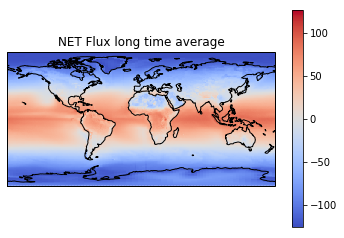

In [9]:
Net_flux_TOA = SW_net_all_timemean - OLR_toa_lw_all_timemean
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
Net_flux_TOA.plot(cmap=plt.cm.coolwarm)
plt.title('NET Flux long time average')
#plot slide 9

In [10]:
#calculate global mean values for OLR and SWDO - SWUP = OLR_toa_lw_all_timemean & SW_net_all_timemean
#not only sum up all values for all lat/lon - but also divide by area which changes with latitude...

In [11]:
#!!!!not taking changing area per latitude into consideration:
OLR_toa_lw_all_timemean.mean()
#OLR should be 239 W m-2

<xarray.DataArray 'toa_lw_all_mon' ()>
array(224.13712, dtype=float32)
Coordinates:
    time     datetime64[ns] 2008-06-30

In [12]:
#!!!!not taking changing area per latitude into consideration:
#SW_net_all_timemean.mean()
#net SW should be...
#actually should calculate mean flux?
#Net_flux_TOA.mean()

In [17]:
lat_factor = np.zeros(180)
OLR_lat_mean_calc = np.zeros(180)
for i in range(0,180):
    ii = OLR_toa_lw_all_timemean.lat[i]#latitude in degrees
    lat_factor[i] = np.cos(np.deg2rad(ii))#cos(lat)
    OLR_lat_mean_calc[i] = OLR_toa_lw_all_timemean[i,:].mean() * lat_factor[i]
#OLR_lat_mean_calc
test 

array([  1.22931573,   3.70909553,   6.32515494,   9.04340358,
        11.88539355,  14.81311151,  17.63248287,  20.404945  ,
        23.14576718,  25.81751392,  28.5124017 ,  31.29185934,
        34.26417397,  37.36945539,  40.71076894,  44.10222611,
        47.69353913,  51.52733443,  55.56614101,  59.4831003 ,
        63.66679035,  67.88018409,  72.11020304,  76.24446808,
        80.14243506,  83.92493447,  87.72875645,  91.49364334,
        95.28050561,  99.07898579, 102.87220392, 106.64541321,
       110.4203094 , 114.17795476, 117.9329443 , 121.74253793,
       125.63585105, 129.46383379, 133.30622089, 137.16685181,
       141.06851519, 145.04472807, 149.0829971 , 153.11797681,
       157.18130725, 161.35165013, 165.53204092, 169.73624632,
       173.96417824, 178.26957458, 182.45907039, 186.62636956,
       190.81807005, 195.08078614, 199.3504396 , 203.56649877,
       207.81916175, 212.07456599, 216.30282151, 220.49166441,
       224.47181269, 228.40140491, 232.15946118, 235.85